# Covid 19 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Covid Data.csv")

# EDA

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.shape

(1048575, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
df.corr()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146


In [8]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

**Yukarda eksik veri olmadığını gösteriyor ama veri setindeki açıklamalarda 97, 98 ve 99'un boş veriler olduğunu belirtiyor, bundan dolayı  hangi sütunda varsa SİLİP DOLDURMAMIZ  gerekiyor. 

In [9]:
df["PNEUMONIA"].value_counts() #HAVA KESESİ İLTİHABI

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [10]:
df["PNEUMONIA"] = df["PNEUMONIA"].replace(99, 2)

In [11]:
df=df.drop("USMER", axis=1) # çok bir etkisi yok

In [12]:
df["TOBACCO"].value_counts()

2     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64

In [13]:
df["TOBACCO"] = df["TOBACCO"].replace(98, 2)

In [14]:
df["PATIENT_TYPE"].value_counts() # HASTANEDE Mİ DEĞİLMİ?

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

In [15]:
df["DIABETES"].value_counts() #Araştırma bulgularına göre, diyabet tanısı olmayan kişilerde kan şekeri seviyesi yükseldikçe Covid-19'u ağır geçirme riski de arttı

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

**araştırma bulgularına göre, diyabet tanısı olmayan kişilerde kan şekeri seviyesi yükseldikçe Covid-19'u ağır geçirme riski de arttı

In [16]:
df["DIABETES"] = df["DIABETES"].replace(98, 1)# diyabetlecovid 19 arasında ters ilişi var.

In [17]:
df["COPD"].value_counts() #Kronik obstrüktif akciğer hastalığı VARMI YOKMU?

2     1030510
1       15062
98       3003
Name: COPD, dtype: int64

In [18]:
df["COPD"] = df["COPD"].replace(98, 2)


In [19]:
df["ASTHMA"].value_counts() #ASTIM

2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64

In [20]:
df["ASTHMA"] = df["ASTHMA"].replace(98, 2)

In [21]:
df["INMSUPR"].value_counts() # "INMSUPR":bağışıklık sisteminin baskılanmasını sağlayan, temel olarak otoimmün hastalıklar ve organ nakillerinde kullanılan ilaçlara verilen genel isimdir

2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64

In [22]:
df["INMSUPR"] = df["INMSUPR"].replace(98, 1) # ÖLÜMLE TERS ORANTILI OLDUĞU İÇİN 

In [23]:
df["HIPERTENSION"].value_counts()

2     882742
1     162729
98      3104
Name: HIPERTENSION, dtype: int64

In [24]:
df["HIPERTENSION"] = df["HIPERTENSION"].replace(98, 2)

In [25]:
df["OTHER_DISEASE"].value_counts()

2     1015490
1       28040
98       5045
Name: OTHER_DISEASE, dtype: int64

In [26]:
df["OTHER_DISEASE"] = df["OTHER_DISEASE"].replace(98, 2)

In [27]:
df["CARDIOVASCULAR"].value_counts()

2     1024730
1       20769
98       3076
Name: CARDIOVASCULAR, dtype: int64

In [28]:
df["CARDIOVASCULAR"] = df["CARDIOVASCULAR"].replace(98, 2)

In [29]:
df["OBESITY"].value_counts()

2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64

In [30]:
df["OBESITY"] = df["OBESITY"].replace(98, 2)

In [31]:
df["RENAL_CHRONIC"].value_counts() # Hastanın kronik böbrek hastalığı olup olmadığı.

2     1026665
1       18904
98       3006
Name: RENAL_CHRONIC, dtype: int64

In [32]:
df["RENAL_CHRONIC"] = df["RENAL_CHRONIC"].replace(98, 2)

In [33]:
df["CLASIFFICATION_FINAL"].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [34]:
df["INTUBED"].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [35]:
df["INTUBED"] = df["INTUBED"].replace(97, 2)
df["INTUBED"] = df["INTUBED"].replace(99, 2)

In [36]:
df["ICU"].value_counts() #intensive care unit.yoğun bakım ünitesi.

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [37]:
df["ICU"] = df["ICU"].replace(97, 2)
df["ICU"] = df["ICU"].replace(99, 2)

In [38]:
df["PREGNANT"].unique()

array([ 2, 97, 98,  1], dtype=int64)

In [39]:
df["PREGNANT"] = df["PREGNANT"].replace(98, 2)# hamile olmamalarına göre değiştirdik
df["PREGNANT"] = df["PREGNANT"].replace(97, 2)

In [40]:
df["CLASIFFICATION_FINAL"].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [41]:
df["CLASIFFICATION_FINAL"] = df["CLASIFFICATION_FINAL"].replace([1,2,3], 1) # covid olan
df["CLASIFFICATION_FINAL"] = df["CLASIFFICATION_FINAL"].replace([4,5,6,7], 2) #covid olmayan

In [42]:
df.sample(10)

,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
342663,6,2,2,18/05/2020,2,1,58,2,1,2,2,2,2,2,2,2,2,2,1,2
500700,12,1,1,9999-99-99,2,2,59,2,2,2,2,2,2,2,2,2,2,1,1,2
1030182,12,1,1,9999-99-99,2,2,26,2,2,2,2,2,2,2,2,2,2,2,2,2
1004552,12,1,1,9999-99-99,2,2,27,2,2,2,2,2,2,2,2,2,2,1,2,2
431722,10,1,2,06/06/2020,2,1,85,2,2,2,2,2,1,2,2,2,2,2,2,1
489399,12,1,1,9999-99-99,2,2,50,2,2,2,2,2,2,2,2,1,2,2,1,2
712820,12,2,1,9999-99-99,2,2,39,2,2,2,2,2,2,2,2,2,2,2,2,2
267810,4,1,1,9999-99-99,2,2,31,2,2,2,2,2,2,2,2,2,2,2,2,2
205461,4,2,1,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,2,2
199323,4,2,1,9999-99-99,2,2,55,2,1,2,2,2,2,2,2,2,2,2,2,2


In [43]:
df.shape

(1048575, 20)

**Eğer "DATE_DIED" sütunundaki bazı verilerde  "9999-99-99"  varsa bu yaşadığı anlamına gelir, tarih değerleride öldüğü anlamına gelir.Bunları sayısal olarak isimlendircez.

In [44]:
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]# yani ölenler "1", yaşayanlarda "2" olarak atandı.

In [45]:
df.corr()["DEATH"].sort_values(ascending=False) 

DEATH                   1.000000
INTUBED                 0.496163
PNEUMONIA               0.469278
DIABETES                0.218504
HIPERTENSION            0.203231
ICU                     0.202333
CLASIFFICATION_FINAL    0.192564
MEDICAL_UNIT            0.149030
RENAL_CHRONIC           0.118744
COPD                    0.089624
CARDIOVASCULAR          0.076410
INMSUPR                 0.059359
OBESITY                 0.056649
OTHER_DISEASE           0.056416
TOBACCO                 0.005441
ASTHMA                 -0.017907
PREGNANT               -0.021166
SEX                    -0.081383
AGE                    -0.320801
PATIENT_TYPE           -0.515582
Name: DEATH, dtype: float64

**"INTUBED" durumuna gelmenin sebeplerinden biri de az bir oranda "MEDİCAL_UNİT" olabilir.Bu yüzden modelimize koyarız.

In [46]:
df.corr()["INTUBED"].sort_values(ascending=False)  

INTUBED                 1.000000
DEATH                   0.496163
ICU                     0.377065
PNEUMONIA               0.339690
CLASIFFICATION_FINAL    0.124009
DIABETES                0.123742
HIPERTENSION            0.116884
MEDICAL_UNIT            0.098304
RENAL_CHRONIC           0.060439
CARDIOVASCULAR          0.045448
COPD                    0.044225
OBESITY                 0.041224
OTHER_DISEASE           0.040750
INMSUPR                 0.038100
TOBACCO                 0.006122
PREGNANT               -0.009930
ASTHMA                 -0.010017
SEX                    -0.053619
AGE                    -0.165490
PATIENT_TYPE           -0.375063
Name: INTUBED, dtype: float64

In [47]:
df.corr()["CLASIFFICATION_FINAL"].sort_values(ascending=False)  

CLASIFFICATION_FINAL    1.000000
PNEUMONIA               0.195232
DEATH                   0.192564
INTUBED                 0.124009
DIABETES                0.093724
HIPERTENSION            0.086533
OBESITY                 0.071468
ICU                     0.064996
MEDICAL_UNIT            0.058648
RENAL_CHRONIC           0.013115
CARDIOVASCULAR          0.010499
COPD                    0.008292
INMSUPR                -0.005336
OTHER_DISEASE          -0.005669
PREGNANT               -0.006417
ASTHMA                 -0.016036
TOBACCO                -0.020250
SEX                    -0.054363
AGE                    -0.155060
PATIENT_TYPE           -0.183198
Name: CLASIFFICATION_FINAL, dtype: float64

# Veri görselleştirme

<AxesSubplot:>

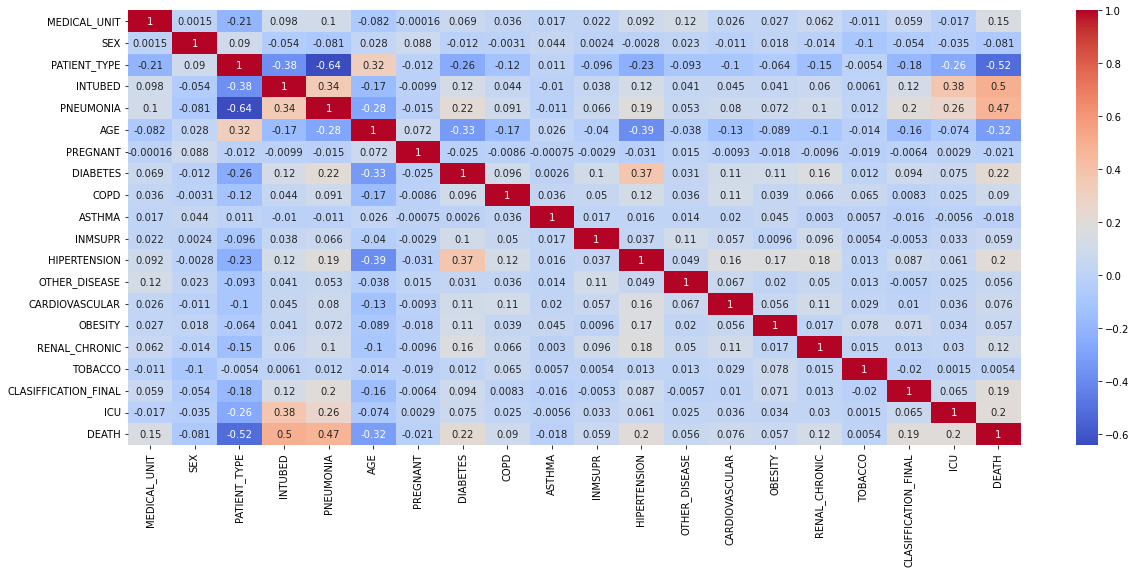

In [48]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") # bu haritada kırmızını yoğun olduğu yerler korelasyonu kuvvetli olan yerlerdir

<AxesSubplot:>

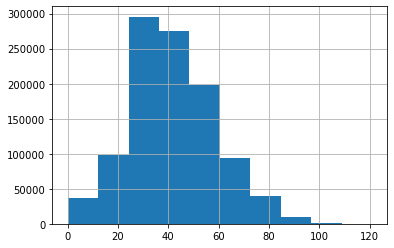

In [49]:
df["AGE"].hist()

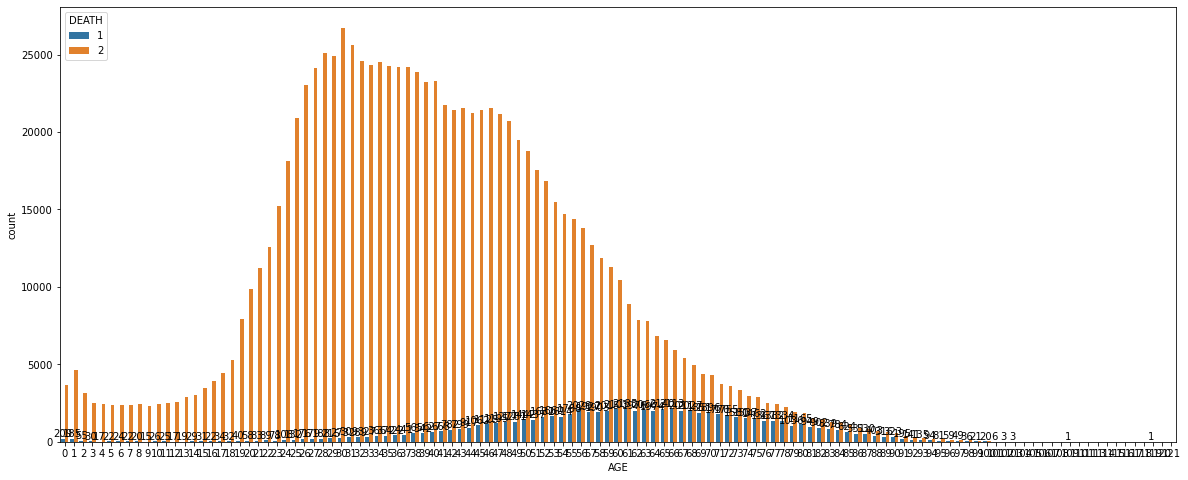

In [50]:
plt.figure(figsize=(20,8))
ax=sns.countplot(x=df["AGE"], hue=df["DEATH"])
ax.bar_label(ax.containers[0]);

<AxesSubplot:xlabel='MEDICAL_UNIT', ylabel='DEATH'>

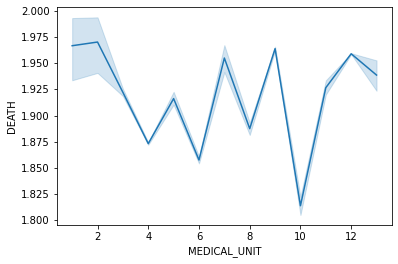

In [51]:
sns.lineplot(data=df, x="MEDICAL_UNIT", y="DEATH")


<AxesSubplot:xlabel='MEDICAL_UNIT', ylabel='ICU'>

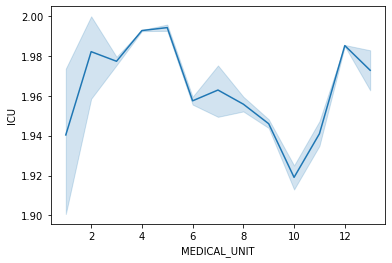

In [53]:
sns.lineplot(data=df, x="MEDICAL_UNIT", y="ICU")


In [54]:
df.columns

Index(['MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEATH'],
      dtype='object')

In [55]:
df["MEDICAL_UNIT"].unique() # Doğal Sağlık hizmeti ödeme gücüne değil, klinik ihtiyaca dayalı bir sağlık hizmetidir.

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [56]:
x=df[['MEDICAL_UNIT', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']]
y=df["DEATH"]

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [ ]:
g.fit(x,y)
b.fit(x,y)

In [60]:
tahmin1=g.predict(x)
tahmin2=b.predict(x)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [62]:
accuracy_score(tahmin1,y)

0.8959282836230121

In [63]:
confusion_matrix(tahmin1,y)


array([[ 57449,  89634],
       [ 19493, 881999]], dtype=int64)

In [64]:

print(classification_report(tahmin1,y))

              precision    recall  f1-score   support

           1       0.75      0.39      0.51    147083
           2       0.91      0.98      0.94    901492

    accuracy                           0.90   1048575
   macro avg       0.83      0.68      0.73   1048575
weighted avg       0.89      0.90      0.88   1048575



In [65]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [1]:
k.fit(x,y)

NameError: name 'k' is not defined

In [ ]:
tahmin3=k.predict(x)

In [ ]:
accuracy_score(tahmin3,y)

In [ ]:
confusion_matrix(tahmin3,y)

In [ ]:
confusion_matrix(tahmin3,y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
model=lr.fit(x_train,y_train)

In [ ]:
tahmin2=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2_score(tahmin2,y_test)

In [ ]:
(mean_squared_error(tahmin2,y_test))**0.5